# <div style="text-align: center"> ЦПТ своими руками </div> 

In [97]:
#необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random
%matplotlib inline


__ Исследуем распределение *Burr*. Попробовав разные распределения, мне показалось что *Burr* не слишком похоже на нормальное.__
__Плотность вероятности: __


### $$ {ck}\frac{(x)^{c-1}}{(1+x^c)^{k+1}} $$ 

Подберем параметры c и d случайным образом (не включая 1, чтобы не получить частные случаи (например fisk) и затем зафиксируем для удобства построения графиков:

In [116]:
c = random.randint(2, 15)
d = random.randint(2, 15)
print c, d

5 8


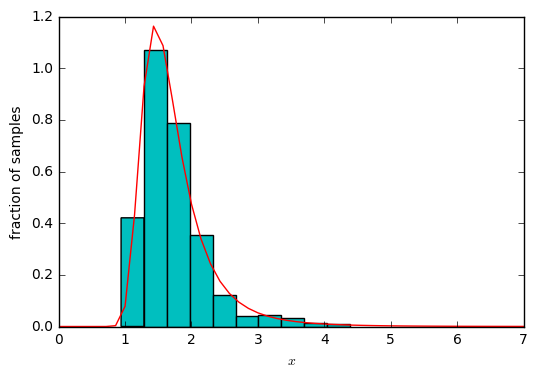

In [139]:
c, d = 5, 8

burr = sts.burr(c,d)
sample = burr.rvs(size=1000)

#гистограмма
plt.hist(sample, normed=True, color='C')

#функция плотности
x = np.linspace(0,7)
pdf = burr.pdf(x)
plt.plot(x, pdf,'r', label='theoretical pdf')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')



По графику заметно, что функция плотности в целом корректно отображает гистограмму.

Матожидание и дисперсию возьмем из методов над распределениями (mean(c, d, loc=0, scale=1), var(c, d, loc=0, scale=1)) 

Нормальное распределение задается через $\mu$ и $\sigma$, будем считать $\sigma$ = $\sqrt\frac{DX}{n}$, где n-размер выборки.


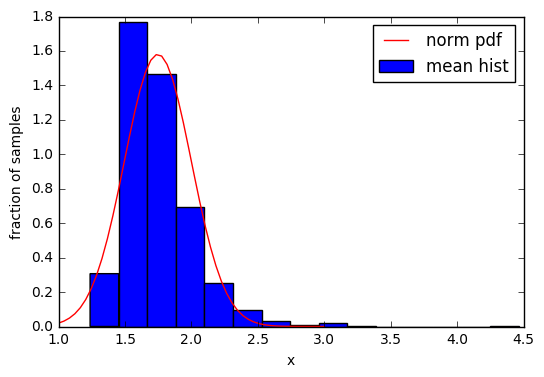

In [167]:
#Построим гистограмму распределения выборочных средних 1000 выборок из 5 элементов. 
#Построим график плотности вероятности нормального распределения среднего согласно ЦПТ.


means = []

for i in range(1000):
    sample = burr.rvs(5)
    means.append(np.mean(sample))

x= np.linspace(1,3)
plt.hist(means, 15, normed=True, label='mean hist')
plt.plot(x, sts.norm.pdf(x, burr.mean(),np.sqrt(burr.var()/5)),'r', label='norm pdf')
plt.xlabel('x')
plt.ylabel('fraction of samples')
plt.legend(loc='best')




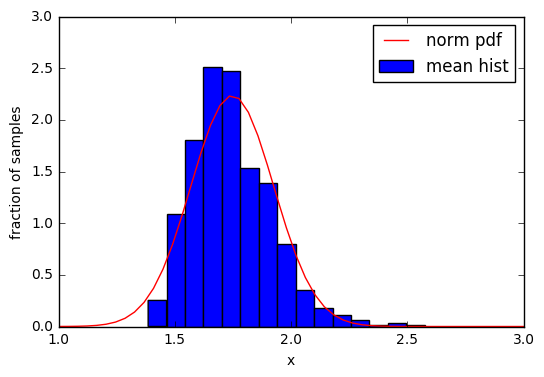

In [168]:
#Повторим для средних 1000 выборок из 10 элементов. 

means = []


for i in range(1000):
    sample = burr.rvs(10)
    means.append(np.mean(sample))

x= np.linspace(1,3)
plt.hist(means, 15, normed=True, label='mean hist')
plt.plot(x, sts.norm.pdf(x, burr.mean(),np.sqrt(burr.var()/10)),'r', label='norm pdf')
plt.xlabel('x')
plt.ylabel('fraction of samples')
plt.legend(loc='best')


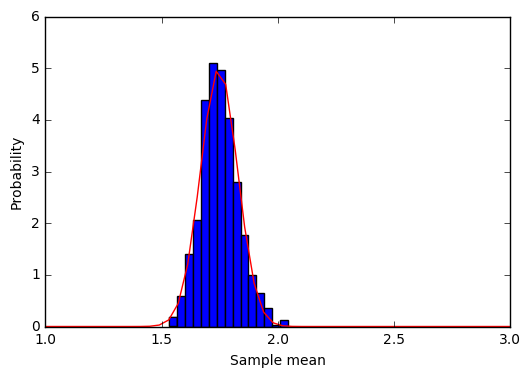

In [169]:
#Повторим для средних 1000 выборок из 50 элементов. 

means = []


for i in range(1000):
    sample = burr.rvs(50)
    means.append(np.mean(sample))

x= np.linspace(1,3)
plt.hist(means, 15, normed=True, label='mean hist')
plt.plot(x, sts.norm.pdf(x, burr.mean(),np.sqrt(burr.var()/50)),'r', label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

ВЫВОДЫ: Гистограмму распределения можно описать нормальным распределением с параметрами  (EX, $\sqrt\frac{DX}{n}$).
При увеличении размера выборки гистограмма начинает точнее напоминать нормальное распределение.
